Readme:

Phase 1:
NLTK stop words are used and extended based on the resulting bag of words.

In the train fucntion the test set is cleaned using scikit stopwords, ( expressions are taken from some web Medium articles ) and the probablity of each class and the count matrix of each word for each class and a mapping from word to index is returnd.

calculate_prob takes these outputs and a test set, cleans it and for each comment calculates the log of p(comment|class) using laplace smoothing.

redults for different alphas are compared on a validation set.

the final results are saved using pandas

Phase 2:
To run other methods just import necessary libraries and run the cells.
numpy, scikit, nltk, pandas, keras and fastai are used in this notebook.

In [13]:
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import string
import re
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/iDev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/iDev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/iDev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Naive Bayes, implementation from scratch:

List of stopwords in Scikit, NLTK and a handmade extension
Text cleaning methods sources:


https://sdsawtelle.github.io/blog/output/spam-classification-part2-vectorization-and-svm-pipeline.html


https://www.datacamp.com/community/tutorials/stemming-lemmatization-python


https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908


https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [14]:
stop_scikit = ['now', 'fill', 'onto', 'get', 'whereupon', 'too', 'if', 'everything', 'etc', 'almost', 'which', 'yet', 'either', 'that', 'someone', 'wherein', 'sixty', 'empty', 'anyway', 'beside', 'other', 'full', 'amoungst', 'same', 'least', 'namely', 'system', 'two', 'hundred', 'ten', 'became', 'please', 'our', 'formerly', 'twenty', 'go', 'to', 'each', 'afterwards', 'twelve', 'call', 'all', 'five', 'none', 'been', 'ever', 'much', 'can', 'such', 'since', 'enough', 'again', 'ie', 'him', 'being', 'hers', 'well', 'what', 'might', 'keep', 'these', 'when', 'whose', 'meanwhile', 'yourselves', 'under', 'nobody', 'for', 'or', 'own', 'cry', 'nothing', 'until', 'anything', 'me', 'but', 'together', 'where', 'most', 'whence', 'after', 'ours', 'last', 'anyone', 'thru', 'whole', 'often', 'thick', 'very', 'with', 'further', 'wherever', 'although', 'she', 'above', 'upon', 'somewhere', 'once', 'them', 'off', 'even', 'who', 'bill', 'eg', 'fifteen', 'must', 'us', 'seeming', 'found', 'how', 'next', 'seems', 'noone', 'would', 'hasnt', 'thin', 'take', 'part', 'they', 'out', 'within', 'interest', 'his', 'toward', 'then', 'never', 'am', 'every', 'throughout', 'always', 'itself', 'against', 'up', 'move', 'along', 'an', 'via', 'beforehand', 'were', 'there', 'amongst', 'seem', 'about', 'few', 'yours', 'at', 'amount', 'herself', 'should', 'mostly', 'sometimes', 'was', 'from', 'moreover', 'thereby', 'he', 'co', 'forty', 'still', 'already', 'whereafter', 'the', 'hence', 'made', 'i', 'see', 'fifty', 'mill', 'something', 'among', 'themselves', 'her', 'everyone', 'one', 'before', 'your', 'why', 'towards', 'eight', 'it', 'cant', 'more', 'as', 'latter', 'find', 'whither', 'latterly', 'back', 'put', 'many', 'hereby', 'thereafter', 'between', 'else', 'here', 'inc', 'describe', 'becoming', 'nowhere', 'both', 'whoever', 'over', 'eleven', 'nor', 'becomes', 'across', 'anyhow', 'besides', 'in', 'whenever', 'though', 'have', 'name', 'no', 'elsewhere', 'do', 'nine', 'whether', 'serious', 'and', 'sometime', 'done', 'this', 'during', 'per', 'cannot', 'third', 'de', 'may', 'otherwise', 'whereas', 'however', 'behind', 'whom', 'only', 'due', 'are', 'down', 'hereafter', 'former', 'six', 'through', 'nevertheless', 'is', 'himself', 'on', 'has', 'mine', 'a', 'hereupon', 'than', 'thence', 'top', 'perhaps', 'its', 'four', 'somehow', 'less', 'seemed', 'couldnt', 'con', 'neither', 'several', 'herein', 'therein', 'bottom', 'by', 'while', 'my', 'those', 'also', 'everywhere', 'ltd', 'around', 'side', 'we', 'first', 'sincere', 'beyond', 'give', 'others', 'un', 'thus', 'another', 'detail', 'ourselves', 'their', 'below', 'be', 'any', 'myself', 'had', 're', 'thereupon', 'could', 'front', 'you', 'therefore', 'fire', 'whatever', 'indeed', 'rather', 'without', 'whereby', 'because', 'some', 'anywhere', 'show', 'alone', 'of', 'so', 'except', 'will', 'become', 'three', 'not', 'yourself', 'into']
stop_nltk = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

extend = ['the', 'httpaddr', 'emailaddr', 'questmark', 'number', 'dollar', 'exclammark', 'ha','http','com','www','fucking','like', 'wa', 'one', 'would', 'get', 'people', 'think', 'nt', 'just', 'peopl', 'becaus', 'time','make','gt', 'did']

punc = list(string.punctuation)

In [51]:
def train(text, label, classes, stopwords):
    
    start = time.process_time()
    word_index = {}
    porter = SnowballStemmer("english")
    listed_text = text.tolist()
    index = 0
    for i, comment in enumerate(listed_text):
        
       # Converting to Lowercase
        comment = comment.lower()

        tokenized = word_tokenize(comment)
        
        stemmed = [porter.stem(word) for word in tokenized]
        
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in stemmed]
        cleaned = [word for word in stripped if word.isalpha()]
        comment = [word for word in cleaned if not word in stopwords]
        listed_text[i] = ' '.join(comment)
                       
        for token in listed_text[i].split():
            if token not in word_index.keys():
                word_index[token] = index
                index += 1
                
    print("total words: ",len(word_index))

    p_class = np.zeros(classes.shape[0])
    
    text = np.array(listed_text)
    
    matrix = np.zeros((len(word_index), classes.shape[0]))
    
    for i, c in enumerate(classes):
        comments = text[label == c]
        p_class[i] = comments.shape[0] / label.shape[0]
        
        for comment in comments:
            for word in comment.split():
                row = word_index[word]
                matrix[row,i] += 1
                
    end = time.process_time()

    print("training:", end - start)
    return (word_index, p_class, matrix, listed_text)

def calculate_prob(text, word_index, count_matrix, p_class, classes, stopwords, alpha=1):
    
    start = time.process_time()
    results = np.zeros(text.shape[0])
    count_matrix = np.add(count_matrix,alpha)
    division_vector = count_matrix.sum(axis = 0) + alpha*count_matrix.shape[0]
    probability_mat = np.divide(count_matrix,division_vector)
    log_prob_mat = np.log(probability_mat)
    
    class_index = np.arange(classes.shape[0])
    
    d = zip(class_index,classes)
    
    index_class = dict(d)
    
    porter = SnowballStemmer("english")
    
    ltext = text.tolist()
    
    for i, comment in enumerate(ltext):

        # Converting to Lowercase
        comment = comment.lower()
        
        tokenized = word_tokenize(comment)
        
        stemmed = [porter.stem(word) for word in tokenized]
        
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in stemmed]
        cleaned = [word for word in stripped if word.isalpha()]
        comment = [word for word in cleaned if not word in stopwords]
        ltext[i] = ' '.join(comment)
    
        vec = np.zeros(count_matrix.shape[1])
        
        for word in ltext[i].split():
            if word in word_index.keys():
                row = word_index[word]
                vec += log_prob_mat[row]
            else:
                vec += np.divide(np.ones(count_matrix.shape[1])*alpha,division_vector)
                
        vec += np.log(p_class)
        results[i] = np.argmax(vec)
        
    end = time.process_time()

    print("pred :", end - start)             
    return (results)

In [47]:
import time
from sklearn.model_selection import train_test_split

np.random.seed(3395)

dataset_text , dataset_label = np.load('data_train-1.pkl',allow_pickle=True)
test_text = np.load('data_test-2.pkl',allow_pickle=True)

dataset_text = np.array(dataset_text)
dataset_label = np.array(dataset_label)


(train_text, validation_text, 
 train_label, validation_label) = train_test_split(dataset_text, dataset_label, test_size=0.1 , random_state=3395)


classes = np.unique(dataset_label)

In [48]:
word_index, p_class, count_matrix, cleaned_text = train(train_text, train_label, classes, set(stop_scikit))

total words:  52005
training: 62.569160999999895


In [54]:
pred_ind = calculate_prob(validation_text, word_index, count_matrix, p_class, classes, set(stop_scikit), alpha=0.12)

pred_labels = classes[pred_ind.astype(int)]

print("Acc :\t" , a, "\t", (np.sum(validation_label == pred_labels) / pred_labels.shape[0]) * 100)

pred : 7.013396000000284
Acc :	 0.6 	 55.17142857142857


In [ ]:
import pandas as pd
start = time.process_time()
word_index, p_class, count_matrix = train(dataset_text, dataset_label, classes, set(stop_scikit))
pred_ind = calculate_prob(np.array(test_text), word_index, count_matrix, p_class, classes, set(stop_scikit), alpha=0.1)
pred_labels = classes[pred_ind.astype(int)]
pd.DataFrame(pred_labels, columns=['Category']).to_csv("submit_naive_bayes_smoothing_ll.csv",header=True,index=True,index_label="Id")
end = time.process_time()
print(end - start)

Naive Bayes using Scikit

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [18]:
stop_scikit = ['now', 'fill', 'onto', 'get', 'whereupon', 'too', 'if', 'everything', 'etc', 'almost', 'which', 'yet', 'either', 'that', 'someone', 'wherein', 'sixty', 'empty', 'anyway', 'beside', 'other', 'full', 'amoungst', 'same', 'least', 'namely', 'system', 'two', 'hundred', 'ten', 'became', 'please', 'our', 'formerly', 'twenty', 'go', 'to', 'each', 'afterwards', 'twelve', 'call', 'all', 'five', 'none', 'been', 'ever', 'much', 'can', 'such', 'since', 'enough', 'again', 'ie', 'him', 'being', 'hers', 'well', 'what', 'might', 'keep', 'these', 'when', 'whose', 'meanwhile', 'yourselves', 'under', 'nobody', 'for', 'or', 'own', 'cry', 'nothing', 'until', 'anything', 'me', 'but', 'together', 'where', 'most', 'whence', 'after', 'ours', 'last', 'anyone', 'thru', 'whole', 'often', 'thick', 'very', 'with', 'further', 'wherever', 'although', 'she', 'above', 'upon', 'somewhere', 'once', 'them', 'off', 'even', 'who', 'bill', 'eg', 'fifteen', 'must', 'us', 'seeming', 'found', 'how', 'next', 'seems', 'noone', 'would', 'hasnt', 'thin', 'take', 'part', 'they', 'out', 'within', 'interest', 'his', 'toward', 'then', 'never', 'am', 'every', 'throughout', 'always', 'itself', 'against', 'up', 'move', 'along', 'an', 'via', 'beforehand', 'were', 'there', 'amongst', 'seem', 'about', 'few', 'yours', 'at', 'amount', 'herself', 'should', 'mostly', 'sometimes', 'was', 'from', 'moreover', 'thereby', 'he', 'co', 'forty', 'still', 'already', 'whereafter', 'the', 'hence', 'made', 'i', 'see', 'fifty', 'mill', 'something', 'among', 'themselves', 'her', 'everyone', 'one', 'before', 'your', 'why', 'towards', 'eight', 'it', 'cant', 'more', 'as', 'latter', 'find', 'whither', 'latterly', 'back', 'put', 'many', 'hereby', 'thereafter', 'between', 'else', 'here', 'inc', 'describe', 'becoming', 'nowhere', 'both', 'whoever', 'over', 'eleven', 'nor', 'becomes', 'across', 'anyhow', 'besides', 'in', 'whenever', 'though', 'have', 'name', 'no', 'elsewhere', 'do', 'nine', 'whether', 'serious', 'and', 'sometime', 'done', 'this', 'during', 'per', 'cannot', 'third', 'de', 'may', 'otherwise', 'whereas', 'however', 'behind', 'whom', 'only', 'due', 'are', 'down', 'hereafter', 'former', 'six', 'through', 'nevertheless', 'is', 'himself', 'on', 'has', 'mine', 'a', 'hereupon', 'than', 'thence', 'top', 'perhaps', 'its', 'four', 'somehow', 'less', 'seemed', 'couldnt', 'con', 'neither', 'several', 'herein', 'therein', 'bottom', 'by', 'while', 'my', 'those', 'also', 'everywhere', 'ltd', 'around', 'side', 'we', 'first', 'sincere', 'beyond', 'give', 'others', 'un', 'thus', 'another', 'detail', 'ourselves', 'their', 'below', 'be', 'any', 'myself', 'had', 're', 'thereupon', 'could', 'front', 'you', 'therefore', 'fire', 'whatever', 'indeed', 'rather', 'without', 'whereby', 'because', 'some', 'anywhere', 'show', 'alone', 'of', 'so', 'except', 'will', 'become', 'three', 'not', 'yourself', 'into']
stop_nltk = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

extend = ['ha','http','com','www','fucking','like', 'wa', 'one', 'would', 'get', 'people', 'think', 'nt', 'just', 'peopl', 'becaus', 'time','make','gt', 'did']

punc = list(string.punctuation)

In [19]:
def clean_text(text, stopwords):
    start = time.process_time()
    porter = SnowballStemmer("english")
    listed_text = text.tolist()
    index = 0
    for i, comment in enumerate(listed_text):
        
        # Converting to Lowercase
        comment = comment.lower()

        # Replace all URLs with special strings
        regx = re.compile(r"(http|https)://[^\s]*")
        comment, nhttps = regx.subn(repl=" httpaddr ", string=comment)

        # Replace all email addresses with special strings
        regx = re.compile(r"\b[^\s]+@[^\s]+[.][^\s]+\b")
        comment, nemails = regx.subn(repl=" emailaddr ", string=comment)

        # Replace all numbers with special strings
        regx = re.compile(r"\b[\d.]+\b")
        comment = regx.sub(repl=" number ", string=comment)

        # Replace all $, ! and ? with special strings
        regx = re.compile(r"[$]")
        comment = regx.sub(repl=" dollar ", string=comment)
        regx = re.compile(r"[!]")
        comment = regx.sub(repl=" exclammark ", string=comment)
        regx = re.compile(r"[?]")
        comment = regx.sub(repl=" questmark ", string=comment)

        # Remove all other punctuation (replace with white space)
        regx = re.compile(r"([^\w\s]+)|([_-]+)")  
        comment = regx.sub(repl=" ", string=comment)

        
        # Make all white space a single space
        regx = re.compile(r"\s+")
        comment = regx.sub(repl=" ", string=comment)
        
        tokenized = word_tokenize(comment)
        
        stemmed = [porter.stem(word) for word in tokenized]
        
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in stemmed]
        cleaned = [word for word in stripped if word.isalpha()]
        comment = [word for word in cleaned if not word in stopwords]
        listed_text[i] = ' '.join(comment)
                
    end = time.process_time()

    print("time:", end - start)
    return listed_text

In [20]:
# Data management
dataset_text , dataset_label = np.load('data_train-1.pkl',allow_pickle=True)
test_text = np.load('data_test-2.pkl',allow_pickle=True)

dataset_text = np.array(dataset_text)
dataset_label = np.array(dataset_label)

test_text = np.array(test_text)

(train_text, validation_text, 
 train_label, validation_label) = train_test_split(dataset_text, dataset_label, test_size=0.1 , random_state=3395)

In [21]:
cleaned_train_text = clean_text(train_text, set(stop_scikit))
cleaned_validation_text = clean_text(validation_text, set(stop_scikit))

time: 48.08176
time: 5.409060999999994


In [22]:
cleaned_dataset_text = clean_text(dataset_text, set(stop_scikit))
cleaned_test_text = clean_text(test_text, set(stop_scikit))

time: 54.433991000000006
time: 22.197136


In [24]:
tf = TfidfVectorizer( ngram_range = (1,1) , max_df=1.0, min_df=2, max_features=None, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True )

dataset_tf= tf.fit_transform(cleaned_dataset_text)

classifier = MultinomialNB(alpha=0.3)

score = cross_val_score(classifier, dataset_tf, dataset_label, cv=10)

print("MNB-Acc :\t" ,
      score * 100 )

MNB-Acc :	 [57.07142857 56.9        57.62857143 57.82857143 57.14285714 56.75714286
 57.48571429 56.81428571 56.92857143 57.5       ]


LinearSVC Using Scikit:

In [25]:
from sklearn.svm import LinearSVC

In [26]:
tf = TfidfVectorizer(ngram_range = (1,1) , max_df=1.0, min_df=2, max_features=None, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True )

dataset_tf= tf.fit_transform(cleaned_dataset_text)

classifier = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=0.3)

score = cross_val_score(classifier, dataset_tf, dataset_label, cv=10)

print("SVM-Acc :\t" ,
score * 100 )

SVM-Acc :	 [56.3        56.27142857 57.35714286 57.07142857 56.17142857 56.24285714
 56.72857143 56.25714286 56.58571429 56.44285714]


Logistic Regression Using Scikit:

In [27]:
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()
label_enc.fit(dataset_label)

train_target = label_enc.transform(train_label) 
validation_target = label_enc.transform(validation_label)

In [28]:
tf = TfidfVectorizer(ngram_range = (1,1) , max_df=1.0, min_df=2, max_features=None, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True )

dataset_tf= tf.fit_transform(cleaned_dataset_text)

classifier = LogisticRegression(C=2.8, penalty = 'l2', solver = 'liblinear', class_weight = None , multi_class = 'auto', max_iter = 1000, n_jobs=-1)
score = cross_val_score(classifier, dataset_tf, dataset_label, cv=10)
print("LogReg-Acc :\t",
      score * 100 )

/Users/iDev/miniconda2/envs/drm/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogReg-Acc :	 [55.31428571 55.58571429 55.98571429 56.12857143 55.52857143 55.05714286
 55.5        55.14285714 55.55714286 55.4       ]


Voting Classifier using Scikit:

source:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

c0 = MultinomialNB(alpha=0.3)
c1 = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=0.3)


In [59]:
v0 = VotingClassifier(estimators=[('mnb', c0), ('svm', c1),], voting='hard')

score = cross_val_score(v0, dataset_tf, dataset_label, cv=10)
print("LogReg-Acc :\t",
      score * 100 )

LogReg-Acc :	 [56.41428571 56.45714286 57.17142857 57.21428571 56.45714286 56.38571429
 57.1        56.14285714 56.74285714 56.98571429]


In [ ]:
v1 = VotingClassifier(estimators=[('mnb', c0), ('svm', c1)], voting='soft')
score = cross_val_score(v1, dataset_tf, dataset_label, cv=10)
print("LogReg-Acc :\t",
      score * 100 )

DNN Using Keras

Source:

https://github.com/kk7nc/Text_Classification#deep-neural-networks

In [ ]:
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics

In [30]:
tf = TfidfVectorizer(ngram_range = (1,1) , max_df=1.0, min_df=2, max_features=None, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True )

train_tf= tf.fit_transform(cleaned_train_text)
validation_tf= tf.transform(cleaned_validation_text)
test_tf = tf.transform(cleaned_test_text)

In [ ]:
model = Sequential()
nodes = 512
layers = 1
input_dim = train_tf.shape[1]
dropout_rate = 0.5
class_num = 20

model.add(Dense(nodes,input_dim=input_dim,activation='relu'))
model.add(Dropout(dropout_rate))
for i in range(0,layers):
    model.add(Dense(nodes,input_dim=nodes,activation='relu'))
    model.add(Dropout(dropout_rate))
model.add(Dense(class_num, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               10958336  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                10260     
Total params: 11,231,252
Trainable params: 11,231,252
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.fit(train_tf, train_target,
                              validation_data=(validation_tf, validation_target),
                              epochs=1,
                              batch_size=128,
                              verbose=2)

predicted = model.predict(validation_tf)

Train on 63000 samples, validate on 7000 samples
Epoch 1/1
 - 118s - loss: 1.2366 - acc: 0.6411 - val_loss: 1.4772 - val_acc: 0.5666


In [35]:
print(metrics.classification_report(validation_target, np.argmax(predicted, axis = 1)))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27       355
           1       0.64      0.68      0.66       377
           2       0.65      0.72      0.69       349
           3       0.80      0.64      0.71       348
           4       0.60      0.63      0.61       345
           5       0.65      0.65      0.65       341
           6       0.41      0.52      0.46       333
           7       0.45      0.40      0.43       346
           8       0.47      0.59      0.52       367
           9       0.29      0.18      0.22       383
          10       0.63      0.74      0.68       337
          11       0.75      0.56      0.65       353
          12       0.66      0.71      0.68       352
          13       0.49      0.59      0.54       352
          14       0.67      0.61      0.64       329
          15       0.60      0.65      0.62       362
          16       0.66      0.66      0.66       346
          17       0.53    

Using pretrained models:

Source:

https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/

In [8]:
from fastai.text import *

dataset_df = pd.DataFrame({'label': dataset_label , 'text': cleaned_dataset_text2 })

train_df , validation_df = train_test_split(dataset_df, stratify = dataset_df['label'], test_size = 0.2, random_state = 3395)

lang_model_data = TextLMDataBunch.from_df(train_df = train_df, valid_df = validation_df, path = "")

classifier_data = TextClasDataBunch.from_df(train_df = train_df, valid_df = validation_df, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [12]:
model_learner = language_model_learner(lang_model_data, AWD_LSTM, drop_mult = 0.7)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 2.51E-02


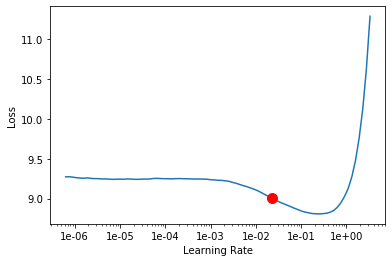

In [13]:
model_learner.lr_find()
model_learner.recorder.plot(suggestion=True)
lr_min = model_learner.recorder.min_grad_lr

In [ ]:
model_learner.fit_one_cycle(1, lr_min)
model_learner.save_encoder('myEnc')

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
model_learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=0.7)
model_learner.load_encoder('myEnc')

In [ ]:
model_learner.fit_one_cycle(1, lr_min)

In [ ]:
predictions, targets = model_learner.get_preds()

predictions = np.argmax(predictions, axis = 1)
pd.crosstab(predictions, targets)